In [1]:
pip install FastAI

In [2]:
import os
from fastai.vision.all import *
from fastai.vision import *
import pandas as pd

In [3]:
path = '/content/Data.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [4]:
Dataset_path='/content/Data/train'

In [5]:
class_names = []
for folder_name in os.listdir(Dataset_path):
  class_names.append(folder_name)

In [6]:
class_names

['Mammooty', '.ipynb_checkpoints', 'Mohanlal']

In [7]:
os.listdir(Dataset_path)

['Mammooty', '.ipynb_checkpoints', 'Mohanlal']

In [8]:
#Load the data
dls = ImageDataLoaders.from_folder(
    path=Dataset_path,
    item_tfms=Resize(224),
    bs=16,
    batch_tfms=[Normalize.from_stats(*imagenet_stats), RandTransform()],
    valid_pct=0.2
)

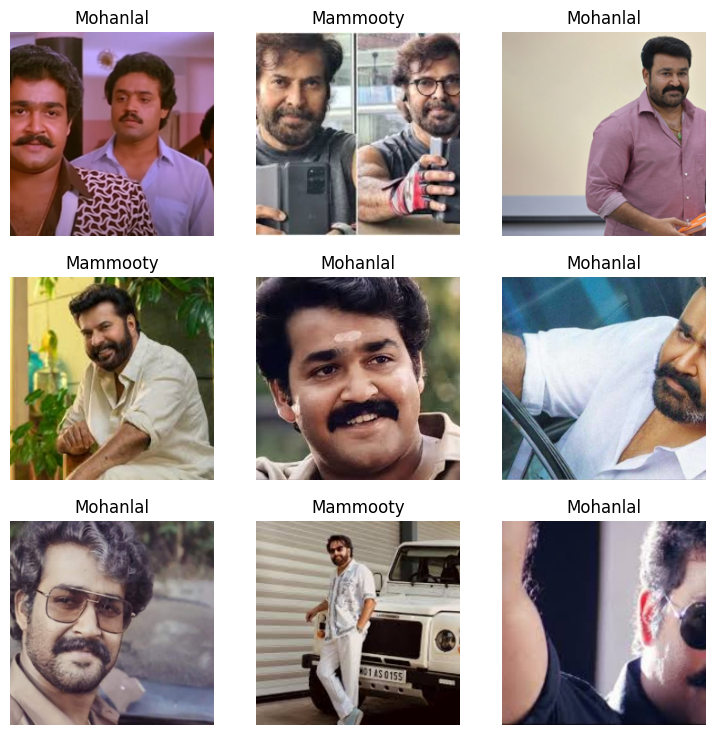

In [9]:
dls.show_batch()

In [10]:
#create model
model=vision_learner(
    dls=dls,
    arch=models.resnet50,
    metrics=[accuracy,error_rate]
)

In [14]:
model.fit(1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.197367,1.187241,0.684211,0.315789,00:49


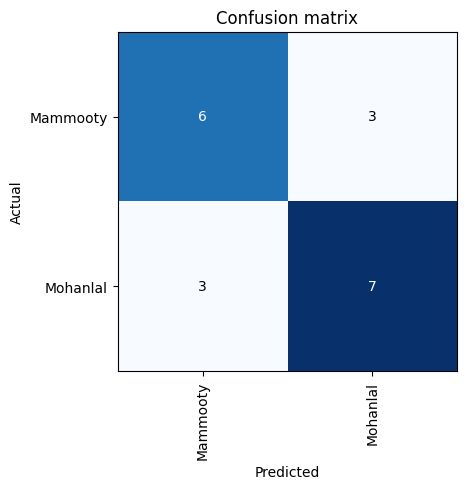

In [15]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

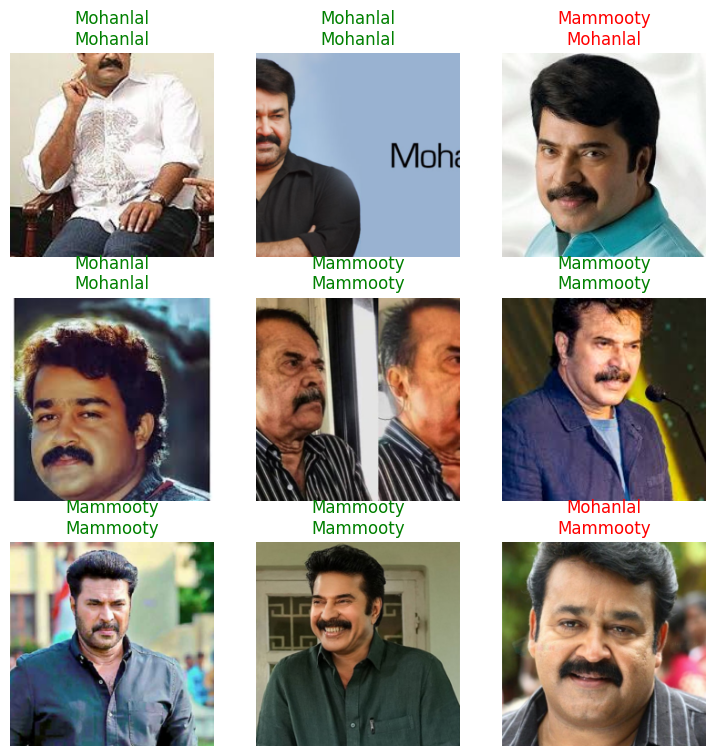

In [16]:
model.show_results()

In [17]:
#save model
model.export('big_m_classifier.pkl')

In [18]:
#load the model
new_model = load_learner('/content/Data/train/big_m_classifier.pkl')

In [19]:
new_model.predict(item='/content/Data/test/Mammooty/58.webp')

('Mohanlal', tensor(1), tensor([4.5345e-04, 9.9955e-01]))